# **ML Algorithms**

## **1. Linear Regression**

In [ ]:
import seaborn as sns
import pandas as pd
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
y=iris[['sepal_length']]
x=iris[['petal_length']]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3) # 70% data for training

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
y_test.head(), y_pred[0:5]

(     sepal_length
 4             5.0
 120           6.9
 119           6.0
 63            6.1
 66            5.6,
 array([[4.85801371],
        [6.66121862],
        [6.36767364],
        [6.24186864],
        [6.15799865]]))

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

0.19000096256429835

## **2. Logistic Regression**:
it works on principle of maximum likelihood estimation. Maximum likelihood estimation maximizes the probablity that classifies the event being 1 or 0 by estimating certain parameters.
It increases the range of probablity from [0,1] to (-s,+s) s is infinity here.


1.   predictive power:weak/medium/strong prediction
2.   Receiver Operaing Characteristics (ROC) curve: It is graphical represention of the performance of a binary classification model.
It shows the variation between True positive and False positive at different threshold values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv('Social_Network_Ads.csv') #not working in colab
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
# Filtering out the required columns: Age and salary
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

In [ ]:
# data split for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [ ]:
# model fitting
from sklearn.linear_model import LogisticRegression
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(random_state=0)

In [ ]:
# model prediction
y_pred=classifier.predict(x_test)

In [ ]:
# model evaluation
from sklearn.metrics import confusion_matrix,classification_report #TP,TN,FP,FN
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[65  3]
 [ 8 24]]


value of True positive & True negative is higher which is indicating good classifier.

In [ ]:
# classification report
cl_report= classification_report(y_test,y_pred)
print(cl_report)
print("Accuracy is:", ((65+24)/(65+3+8+24))*100)

              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100

Accuracy is: 89.0


## **3. Naive Bayes Classification**
It works on Bayes Theorem

### **EXAMPLE-1: Diabetes prediction** on Pima Indians Diabetes Database using Naive Bayes:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv('diabetes.csv')
print(data.shape) # dimension of data
data.head(20)

(768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [ ]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


**missing value detection** and Treatment:
The following values in a data set are considered to be missing values:

1.   Blank values
2.   NaN
3.   null
4.   some continuous columns might have 0's to indicate mising data

In [ ]:
# let's start by checking the count of records in each column of the dataset
# if count of records is leser than total no. of record i.e.768, we can conclude there are blank records.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


i.e., no blank columns in above data

In [ ]:
# 2nd method
data.isna()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
# 2nd method
data.isna().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
#  since all the predicotr columns are continuous, there might be a chance of 0's in column
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


the data above describe that there are some values zero which are not possible.pregnancies column can have zero but columns Glucose,BloodPressure,	SkinThickness,	Insulin and	BMI can not have zero values. It means there are some missing values in our dataset. we can replace the missing values with median, since median is least affetcted by outliers.

In [ ]:
# replace 0's with NaN.
from numpy import nan
data['Glucose']=data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']=data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

In [ ]:
data.head(20)  # we can see zerro is replaced with NaN

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


In [ ]:
data.isnull().any()  # now NaN represents missing values in the data

Pregnancies                 False
Glucose                      True
BloodPressure                True
SkinThickness                True
Insulin                      True
BMI                          True
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [ ]:
# count of NaN (i.e, missing) values in the dataset
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [ ]:
# imputing missing values with their respective columns median
data.fillna(data.median(),inplace=True)

In [ ]:
# let's check if missing values have been imputed
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


**Outlier Detection & Treatment:**
Boxplot is a great way of detecting outliers. once the outliers have been detected, they can be imputed with the 5th & 95th percentiles.

<Axes: ylabel='Age'>

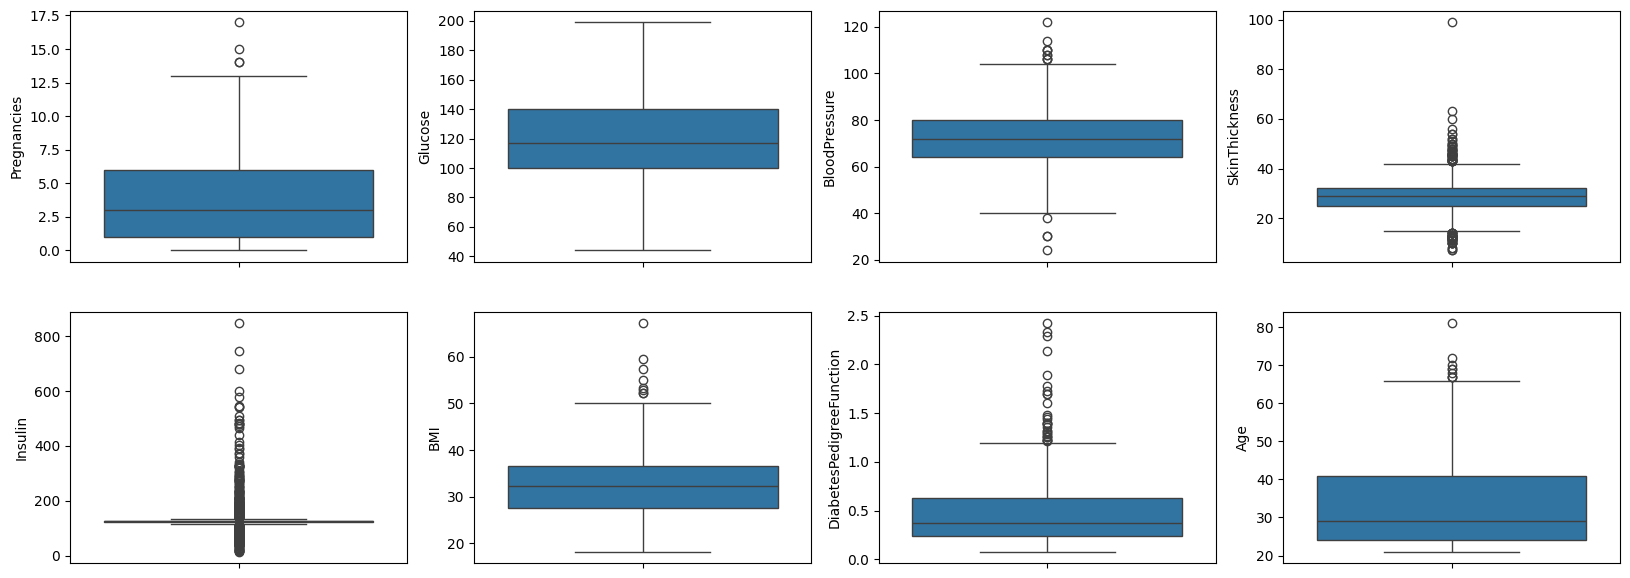

In [ ]:
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

here, dot represents presence of outlier. eg. Pregnancies. Glucose don't have outliers.
**To deal with the outliers:**
Apart from Glucose all the other attributes show presence of outliers. These lower level & upper level outliers will be replaced by the 5th & 95th percentile respectively.

In [ ]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper=data['Pregnancies'].quantile(0.95))
data['Glucose']=data['Glucose'].clip(lower=data['Glucose'].quantile(0.05),upper=data['Glucose'].quantile(0.95))
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05),upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper=data['SkinThickness'].quantile(0.95))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05),upper=data['Insulin'].quantile(0.95))
data['BMI']=data['BMI'].clip(lower=data['BMI'].quantile(0.05),upper=data['BMI'].quantile(0.95))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))

<Axes: ylabel='Age'>

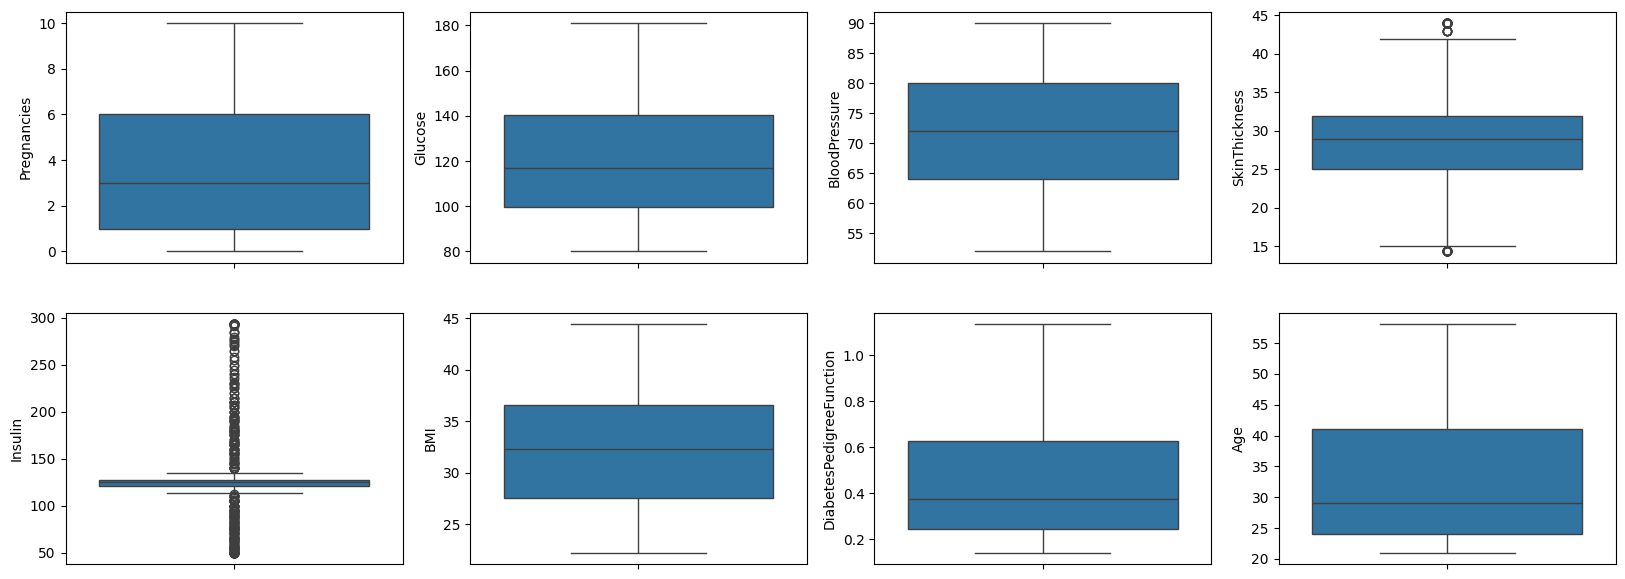

In [ ]:
# let's visualize box plot again after imputing the outliers
plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
sns.boxplot(data['Pregnancies'])

plt.subplot(4,4,2)
sns.boxplot(data['Glucose'])

plt.subplot(4,4,3)
sns.boxplot(data['BloodPressure'])

plt.subplot(4,4,4)
sns.boxplot(data['SkinThickness'])

plt.subplot(4,4,5)
sns.boxplot(data['Insulin'])

plt.subplot(4,4,6)
sns.boxplot(data['BMI'])

plt.subplot(4,4,7)
sns.boxplot(data['DiabetesPedigreeFunction'])

plt.subplot(4,4,8)
sns.boxplot(data['Age'])

<Axes: ylabel='Insulin'>

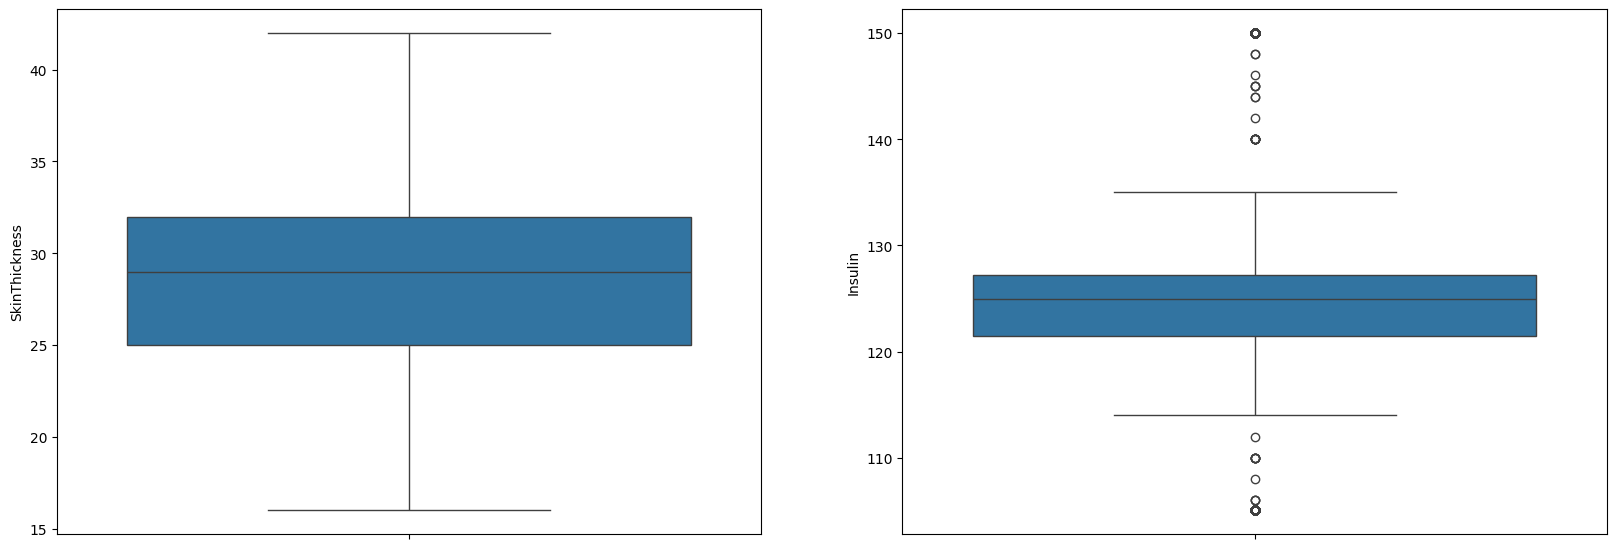

In [ ]:
# As we can see, there are still outliers in the column SkinThickness & Insulin. Let's manipulate the percentile value
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.07),upper=data['SkinThickness'].quantile(0.93))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.21),upper=data['Insulin'].quantile(0.80))
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.boxplot(data['SkinThickness'])
plt.subplot(2,2,2)
sns.boxplot(data['Insulin'])

**Data Visualisation**

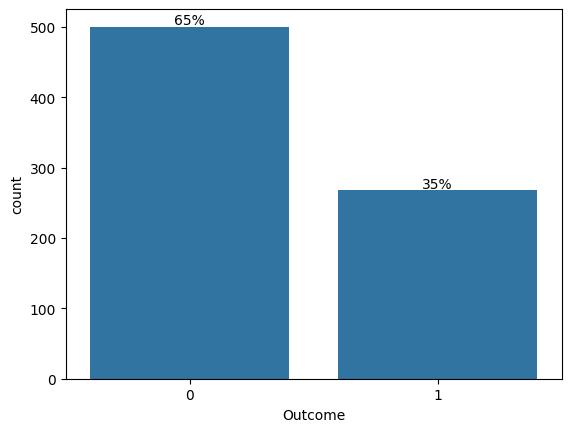

In [ ]:
# let's understand the distribution of diabitic vs non-dibitic patients in the dataset
total=float(len(data))
ax=sns.countplot(x="Outcome",data=data)
for p in ax.patches:
  height=p.get_height()
  ax.text(p.get_x()+p.get_width()/2.,
                                height+3,
                                '{0:.0%}'.format(height/total),
                                ha="center")

about 65% of data contains records belonging to non-diabetic patients. The dataset has a class imbalance and might have to be treated in future,during the model building stages.

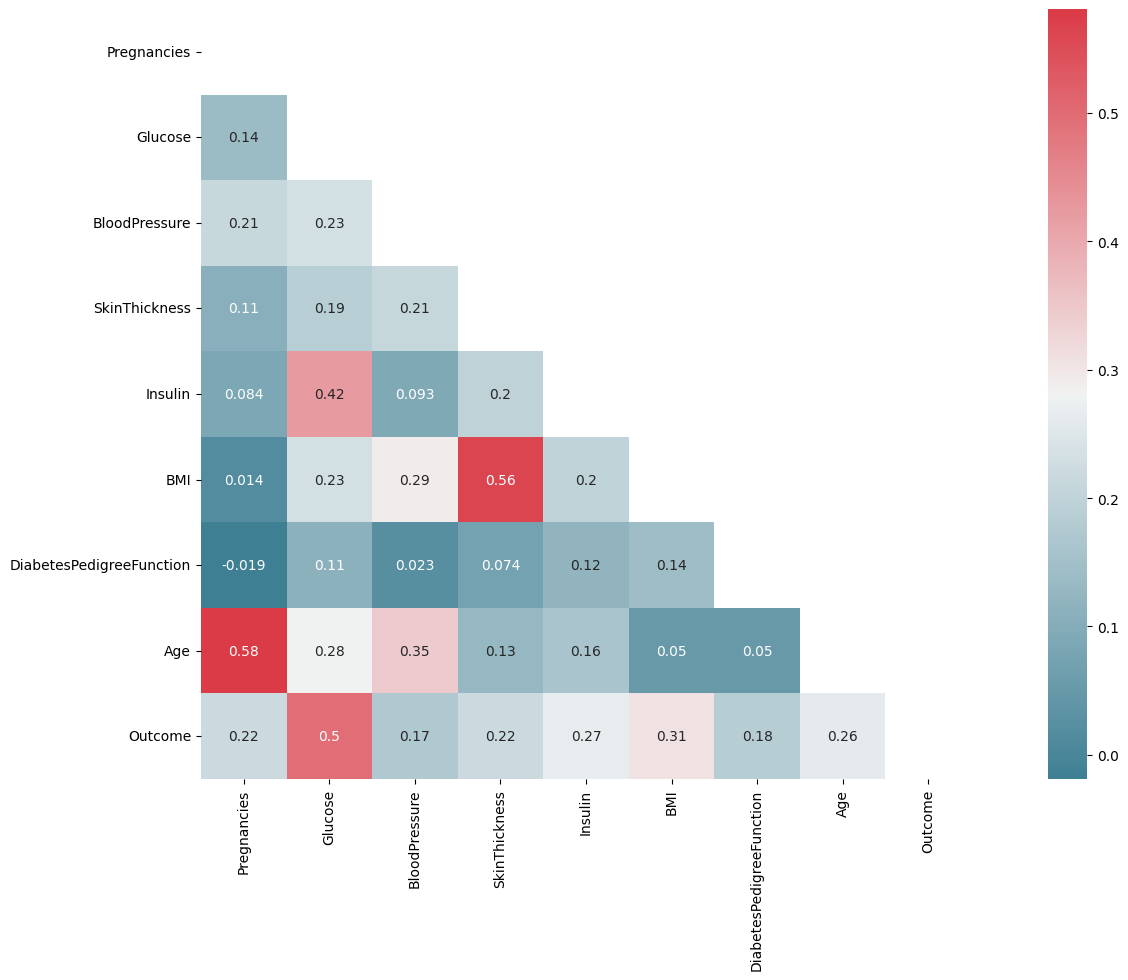

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Let's plot a correlation plot: To understand if there is multi-collinearity in the dataset
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr(method="pearson")

# Define the mask to hide the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a heatmap
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot=True)

plt.show()

from the above corr-plot it can be inferred thet there is no high multi-colinearity in the dataset.

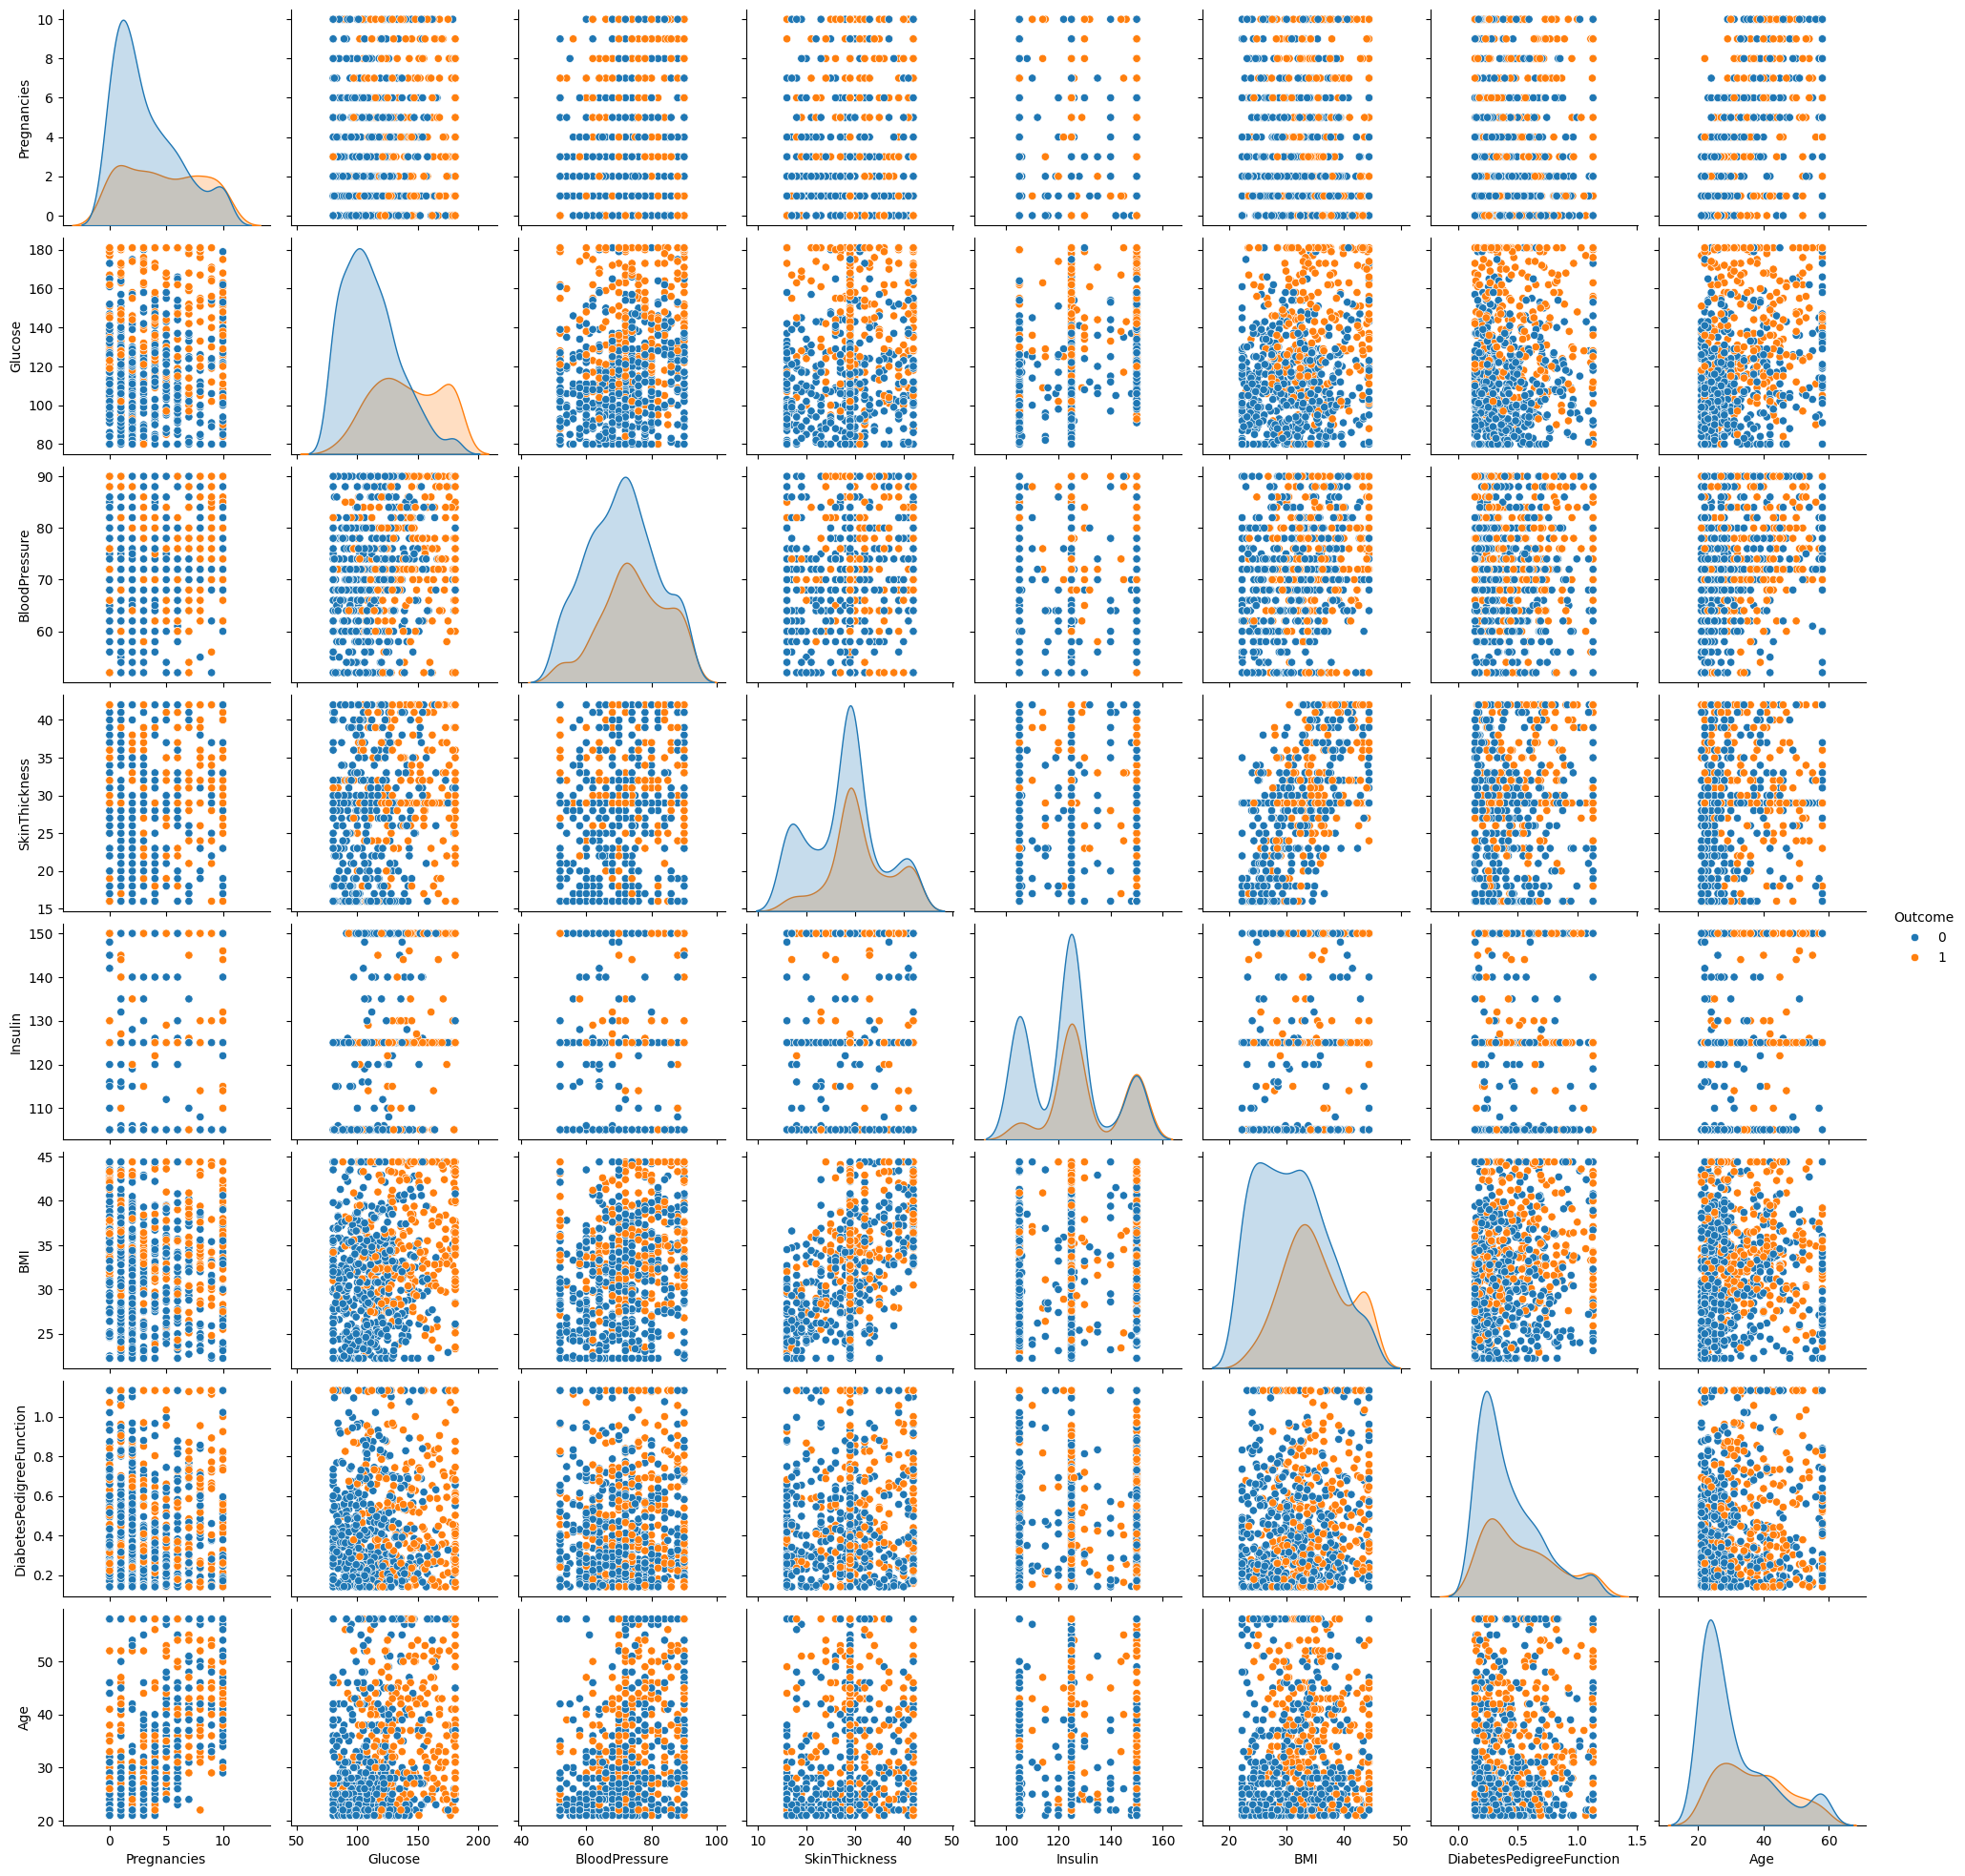

In [ ]:
# pair plot analysis
sns.pairplot(data,hue='Outcome',diag_kind='kde')

from above pairplot, we can infer that, most of the predicator variables are weak predicators of outcome. the kernal density plots(diagonal) suggsts that the distribution for diabetic and non-diabetic are very similar and are overlapping each other significantly, hence they wont be able to differentiate between a diabetic  patient & non-diabetic patient.

The scatterplots also suggest very poorly corelated data( data with no hidden patterns or relationships). hence model built on this data might not be able to identify any hidden patters or might identify nonsense patterns.

In [ ]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
xTrain,xTest,yTrain,yTest= train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

# creat a gaussian classifier
model= GaussianNB()

model.fit(xTrain,yTrain)

predicted= model.predict(xTest)

print("Predicted Value:",predicted)

Predicted Value: [1 0 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [ ]:
# check the model accuracy:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(yTest,predicted))

Accuracy: 0.7727272727272727


## **4. Decision Tree:** supervised learning method used for both classification & Regression.
Decision Tree Algorithm:-**CART**(classification and Regression Tree). Dependent variables may be:


1.   Categorical in nature: spam/non-spam, tumor/ no tumer, lend money/deny, etc
2.   Numerical in nature: Predict stock returns, sports scores, pricing a house, etc.    
Q. How are deciision trees built? Idea is to segment the space into a number of simple regions.




### EX-1: Iris dataset

In [ ]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Text(0.5, 0, 'Sepal length')

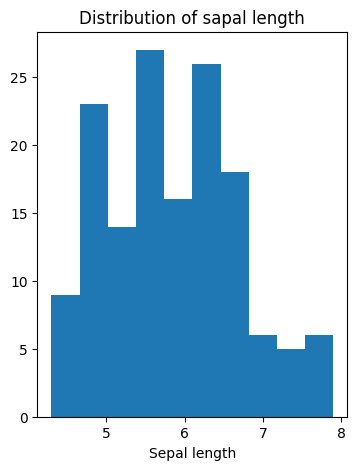

In [ ]:
plt.figure(figsize=(4,5))
plt.hist(iris['sepal_length'])
plt.title("Distribution of sapal length")
plt.xlabel("Sepal length")

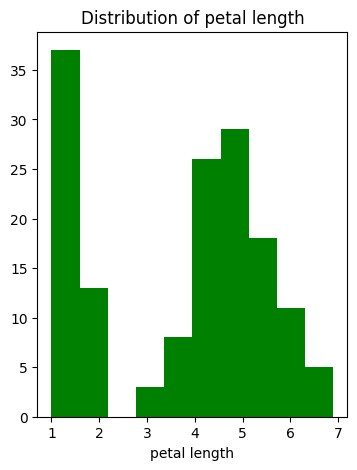

In [ ]:
plt.figure(figsize=(4,5))
plt.hist(iris['petal_length'], color='g')
plt.title("Distribution of petal length")
plt.xlabel("petal length")
plt.show()

In [ ]:
# let's start model
y=iris[['species']]
x=iris[['sepal_length']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

dtc=DecisionTreeClassifier()

dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred1 = dtc.predict(x_test)
y_pred1

array(['versicolor', 'setosa', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'virginica'],
      dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred1)

array([[14,  1,  0],
       [ 2,  9,  3],
       [ 0, 12,  4]])

left diagonal represents all of the correctly classified values.

In [ ]:
(14+9+4)/(14+9+4+1+2+3+12)

0.6

60% accuracy is less. It means only sepal length as independent variable is not a good idea.

In [ ]:
# now, include petal length also as a independent variable
## Model-2

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

# Load the Iris dataset from seaborn
iris = sns.load_dataset('iris')
# iris.head()

y=iris[['species']]
x=iris[['sepal_length','petal_length']]

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)

dtc2=DecisionTreeClassifier()

dtc2.fit(x_train,y_train)

y_pred2 = dtc2.predict(x_test)

confusion_matrix(y_test,y_pred2)

print(y_pred2)
confusion_matrix(y_test,y_pred2)

['virginica' 'setosa' 'setosa' 'setosa' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa' 'setosa'
 'virginica' 'setosa' 'versicolor' 'virginica' 'versicolor' 'virginica'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'virginica' 'virginica' 'setosa' 'virginica' 'setosa'
 'virginica' 'versicolor' 'virginica' 'setosa' 'versicolor' 'virginica'
 'setosa' 'versicolor' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'versicolor' 'setosa' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'virginica' 'virginica' 'setosa' 'versicolor' 'setosa' 'versicolor'
 'versicolor' 'setosa' 'versicolor' 'versicolor' 'versicolor']


array([[21,  0,  0],
       [ 0, 22,  2],
       [ 0,  0, 15]])

In [ ]:
# accuracy is: now very good
(21+22+15)/(21+22+15+2)

0.9666666666666667

### EX-2:

## **5. Random Forest**

### EX-1: Covid_19_India dataset

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)
df.head()

<ipython-input-2-7a7af716504c>:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df=pd.read_csv('covid_19_india.csv',parse_dates=['Date'],dayfirst=True)


,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [3]:
df=df[['Date','State/UnionTerritory','Cured','Deaths','Confirmed']]
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [4]:
# convert all in small alters and also replace State/UnionTerritory with state only
df.columns=['date','state','cured','deaths','confirmed']
df.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [5]:
df.tail()

,date,state,cured,deaths,confirmed
18105,2021-08-11,Telangana,638410,3831,650353
18106,2021-08-11,Tripura,77811,773,80660
18107,2021-08-11,Uttarakhand,334650,7368,342462
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999


In [6]:
# let's see latest data records
today=df[df.date=='2021-08-11']
today.head()

,date,state,cured,deaths,confirmed
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18076,2021-08-11,Arunachal Pradesh,47821,248,50605
18077,2021-08-11,Assam,559684,5420,576149
18078,2021-08-11,Bihar,715352,9646,725279


EX: let's see the state with maximum number of confirmed cases reported today:

In [7]:
max_confirmed_cases=today.sort_values(by="confirmed",ascending=False)
print(max_confirmed_cases.shape)
max_confirmed_cases.head(10)

(36, 5)


,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812
18109,2021-08-11,West Bengal,1506532,18252,1534999
18082,2021-08-11,Delhi,1411280,25068,1436852
18080,2021-08-11,Chhattisgarh,988189,13544,1003356
18099,2021-08-11,Odisha,972710,6565,988997


In [8]:
max_confirmed_cases.tail()

,date,state,cured,deaths,confirmed
18103,2021-08-11,Sikkim,25095,356,28018
18091,2021-08-11,Ladakh,20130,207,20411
18081,2021-08-11,Dadra and Nagar Haveli and Daman and Diu,10646,4,10654
18092,2021-08-11,Lakshadweep,10165,51,10263
18074,2021-08-11,Andaman and Nicobar Islands,7412,129,7548


In [9]:
# take out the top 5 states
top_states_confirmed=max_confirmed_cases[0:5]
top_states_confirmed

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


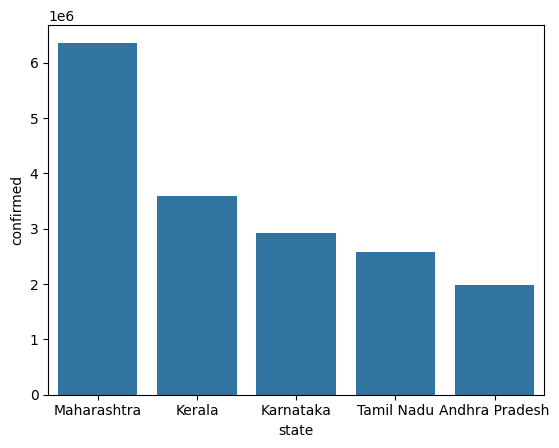

In [10]:
# lets visualise with bar plots
sns.barplot(x="state",y="confirmed",data=top_states_confirmed)
plt.show()

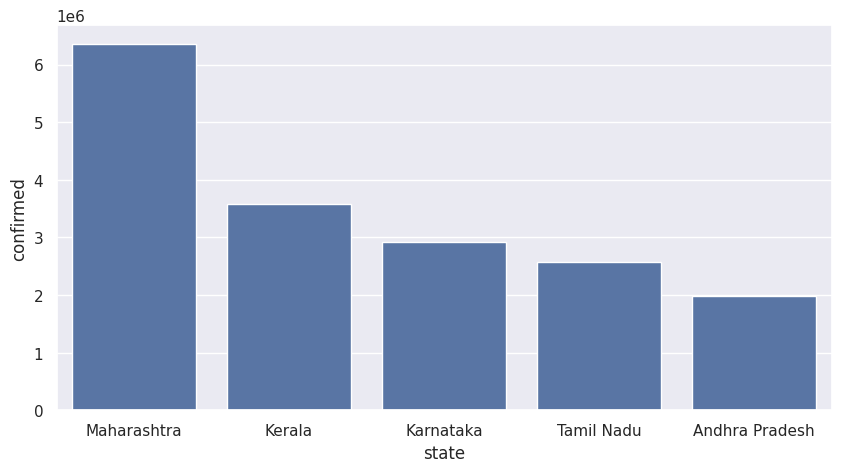

In [30]:
# lets visualise with bar plots
sns.set(rc={'figure.figsize':(10,5)})    #if we want increase the size
sns.barplot(x="state",y="confirmed",data=top_states_confirmed)
plt.show()

EX: let's see the state with maximum number of death cases reported today:

In [12]:
max_death_cases=today.sort_values(by="deaths",ascending=False)
max_death_cases.head(5)

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18082,2021-08-11,Delhi,1411280,25068,1436852
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812


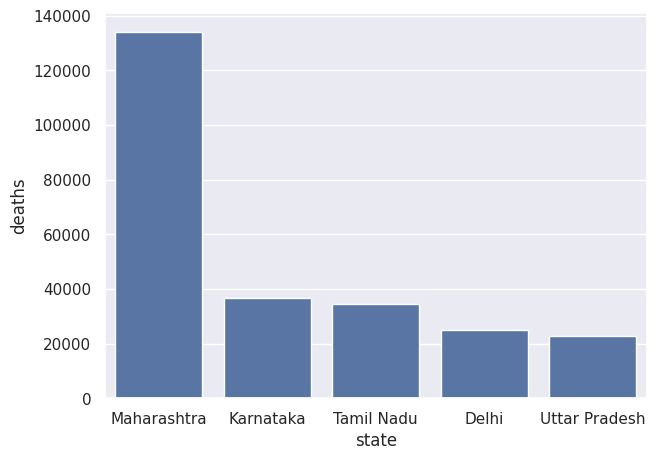

In [13]:
# extract the top 5 states
top_states_death=max_death_cases[0:5]
# lets visualise with bar plots
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x="state",y="deaths",data=top_states_death)
plt.show()

EX: let's see the state with maximum number of death cases reported today:

In [14]:
max_cured_cases=today.sort_values(by="cured",ascending=False)
max_cured_cases.head()

,date,state,cured,deaths,confirmed
18094,2021-08-11,Maharashtra,6159676,134201,6363442
18090,2021-08-11,Kerala,3396184,18004,3586693
18089,2021-08-11,Karnataka,2861499,36848,2921049
18104,2021-08-11,Tamil Nadu,2524400,34367,2579130
18075,2021-08-11,Andhra Pradesh,1952736,13564,1985182


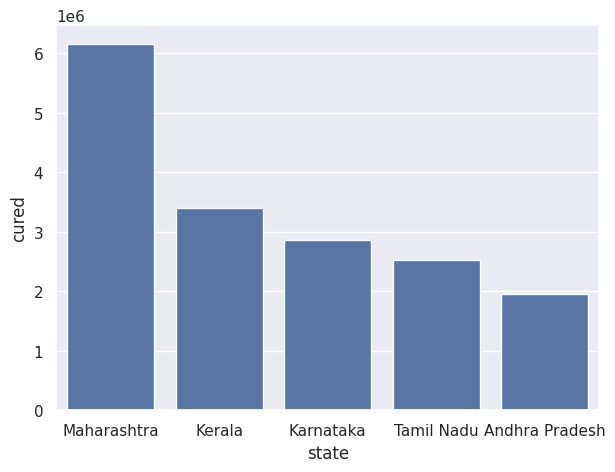

In [15]:
# extract the top 5 states
top_states_cured=max_cured_cases[0:5]
# lets visualise with bar plots
sns.set(rc={'figure.figsize':(7,5)})
sns.barplot(x="state",y="cured",data=top_states_cured)
plt.show()

**let's see the trend of records in Maharashtra:**

In [16]:
maha=df[df.state=='Maharashtra']
maha.head()

,date,state,cured,deaths,confirmed
76,2020-03-09,Maharashtra,0,0,2
91,2020-03-10,Maharashtra,0,0,5
97,2020-03-11,Maharashtra,0,0,2
120,2020-03-12,Maharashtra,0,0,11
133,2020-03-13,Maharashtra,0,0,14


In [17]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,2021-08-07,Maharashtra,6130137,133717,6341759
17986,2021-08-08,Maharashtra,6139493,133845,6347820
18022,2021-08-09,Maharashtra,6144388,133996,6353328
18058,2021-08-10,Maharashtra,6151956,134064,6357833
18094,2021-08-11,Maharashtra,6159676,134201,6363442


i.e. 1st case (2cases) in maharashtra came on 09-03-2020 & last case (63 lakh) on 11-08-2021

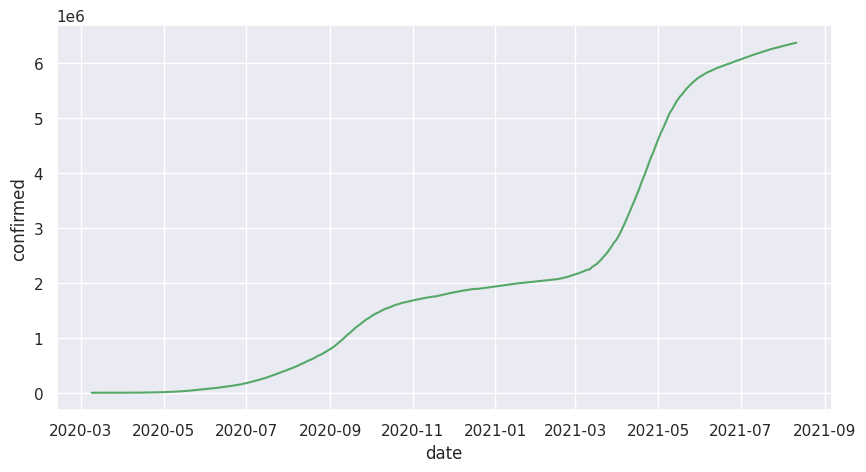

In [18]:
# let's plot line plot of confirmed cases
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date",y="confirmed",data=maha,color="g")
plt.show()

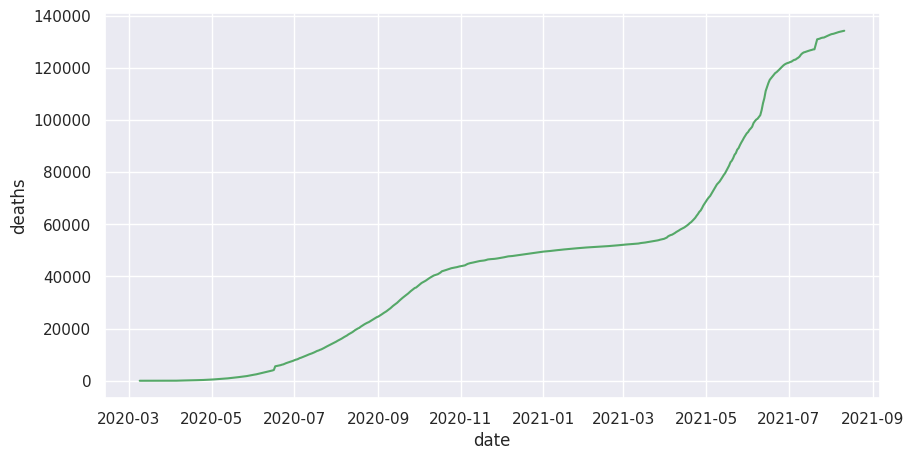

In [19]:
# let's plot lineplot of death cases
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date",y="deaths",data=maha,color="g")
plt.show()

**let's see the trend of records in Kerala:**

In [20]:
kerala=df[df.state=='Kerala']
kerala.head()

,date,state,cured,deaths,confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2
3,2020-02-02,Kerala,0,0,3
4,2020-02-03,Kerala,0,0,3


In [21]:
kerala.tail()

,date,state,cured,deaths,confirmed
17946,2021-08-07,Kerala,3317314,17515,3513551
17982,2021-08-08,Kerala,3337579,17654,3533918
18018,2021-08-09,Kerala,3357687,17747,3552525
18054,2021-08-10,Kerala,3377691,17852,3565574
18090,2021-08-11,Kerala,3396184,18004,3586693


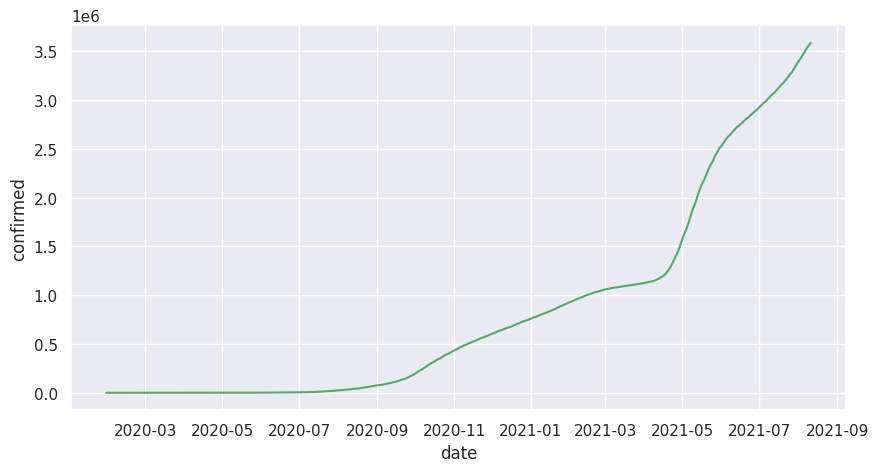

In [22]:
# let's plot line plot of confirmed cases
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date",y="confirmed",data=kerala,color="g")
plt.show()

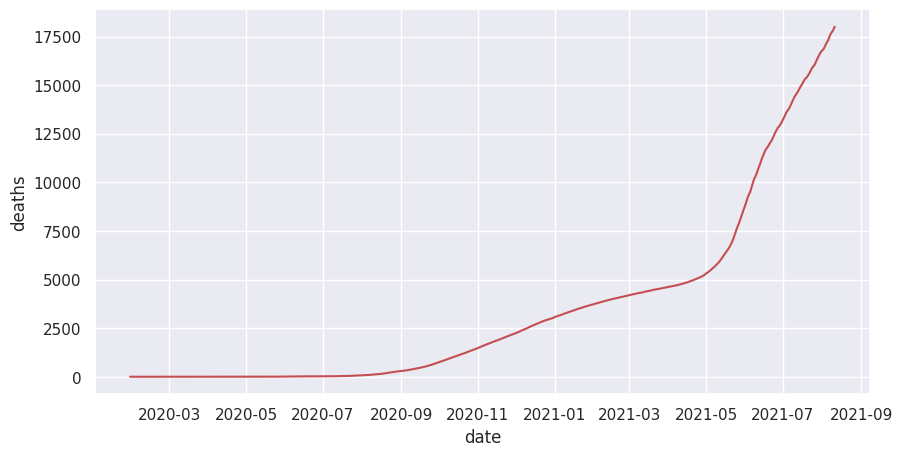

In [23]:
# let's plot lineplot of death cases
sns.set(rc={'figure.figsize':(10,5)})
sns.lineplot(x="date",y="deaths",data=kerala,color="r")
plt.show()

Let's use **Random Forest algorithm as a Regression algorithm**, to predict the no. of confirmed cases by giving any date.

In [24]:
# we will do for Maharashtra state
maha['date']=maha['date'].map(dt.datetime.toordinal) # converting the date column into ordinal value
maha.head()

<ipython-input-24-ee025f1fdb63>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  maha['date']=maha['date'].map(dt.datetime.toordinal) # converting the date column into ordinal value


,date,state,cured,deaths,confirmed
76,737493,Maharashtra,0,0,2
91,737494,Maharashtra,0,0,5
97,737495,Maharashtra,0,0,2
120,737496,Maharashtra,0,0,11
133,737497,Maharashtra,0,0,14


In [25]:
x=maha['date']
y=maha['confirmed']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [26]:
y_train

10966    2009106
11110    2018413
12334    2179185
17590    6276057
788         1135
          ...   
9778     1902458
5145      548313
7945     1678406
17626    6282914
2829       88528
Name: confirmed, Length: 364, dtype: int64

In [27]:
# we want to remove the index values in the above output
rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

<ipython-input-27-357fa468ba59>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))


RandomForestRegressor()

In [28]:
maha.tail()

,date,state,cured,deaths,confirmed
17950,738009,Maharashtra,6130137,133717,6341759
17986,738010,Maharashtra,6139493,133845,6347820
18022,738011,Maharashtra,6144388,133996,6353328
18058,738012,Maharashtra,6151956,134064,6357833
18094,738013,Maharashtra,6159676,134201,6363442


In [29]:
# let's say we want data for any date eg.:
rf.predict(np.array([[738020]]))

array([6356508.72])

The above is only a baseline of RandomForest algorithm, there needs more modifications for accurate prediction.

## **6. Support Vector Machine (SVM)**

### EX-1: Social_Network_Ads dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset=pd.read_csv('Social_Network_Ads.csv')
print(dataset.shape)
dataset.head()

(400, 5)


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [ ]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0
399,15594041,Female,49.0,36000.0,1


In [ ]:
# filtering out columns to retain age and salary columns
x=dataset.iloc[:,[2,3]].values
y=dataset.iloc[:,4].values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0) #75% for training

#scaling using standard scaler for Normal Distribution
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

# Building the model using RBF Kernel
from sklearn.svm import SVC
classifier_rbf=SVC(kernel='rbf',random_state=0)
classifier_rbf.fit(x_train,y_train)

y_pred_rbf=classifier_rbf.predict(x_test)

# printing the confusion matrix
from sklearn.metrics import confusion_matrix
cm_rbf=confusion_matrix(y_test,y_pred_rbf)
print(cm_rbf)

[[64  4]
 [ 3 29]]


In [ ]:
# classification report
from sklearn.metrics import classification_report
class_report_rbf=classification_report(y_test,y_pred_rbf)
print(class_report_rbf)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



## **7. KNN (K-Nearest Neighbour) Algorithm**

In [10]:
import numpy as np
import pandas as pd
import sklearn
bos1=pd.read_csv('HousingData.csv')
bos1.sample(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5,398,18.7,386.96,10.27,20.8
482,5.73116,0.0,18.10,NaN,0.532,7.061,77.0,3.4106,24,666,20.2,395.28,7.01,25.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
167,1.80028,NaN,19.58,0.0,0.605,5.877,79.2,2.4259,5,403,14.7,227.61,12.14,23.8
47,0.22927,0.0,NaN,0.0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80,16.6
21,0.85204,0.0,8.14,0.0,0.538,5.965,89.2,4.0123,4,307,21.0,392.53,13.83,19.6
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9
79,0.08387,0.0,12.83,0.0,0.437,5.874,36.6,4.5026,5,398,18.7,396.06,NaN,20.3
290,0.03502,80.0,4.95,0.0,0.411,6.861,27.9,5.1167,4,245,19.2,396.90,3.33,28.5
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4,437,21.2,394.67,16.96,18.1


In [7]:
bos1.shape

(506, 14)

In [11]:
# Preprocessing the data:
# checking for NaN entries
bos1.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

The preprocessing step to handle the NaN entries, following strategies can be used:

1. Remove rows with NaN values: If the number of rows with missing values is small compared to the dataset size, that row can entirely be removed.

2. Impute missing values: missing values can be fill with some these values:

a) Mean Imputation: Replace NaN values with the mean of the column.

b) Median Imputation: Replace NaN values with the median of the column.

c) Mode Imputation: Replace NaN values with the mode (most frequent value) of the column.

d) Interpolation: Use interpolation methods to estimate the missing values.

e) Using a Model: Predict the missing values using a machine learning model trained on the observed data.

f) Indicator variable for NaN: Create an indicator variable (binary feature) that indicates whether the value was originally missing.

In [12]:
data = {
    'CRIM': [np.nan] * 20 + list(range(20, 100)),
    'ZN': [np.nan] * 20 + list(range(20, 100)),
    'INDUS': [np.nan] * 20 + list(range(20, 100)),
    'CHAS': [np.nan] * 20 + list(range(20, 100)),
    'NOX': list(range(100)),
    'RM': list(range(100)),
    'AGE': [np.nan] * 20 + list(range(20, 100)),
    'DIS': list(range(100)),
    'RAD': list(range(100)),
    'TAX': list(range(100)),
    'PTRATIO': list(range(100)),
    'B': list(range(100)),
    'LSTAT': [np.nan] * 20 + list(range(20, 100)),
    'MEDV': list(range(100))
}

df = pd.DataFrame(data)

# Imputation strategy (mean imputation in this case)
columns_with_nan = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
for column in columns_with_nan:
    df[column].fillna(df[column].mean(), inplace=True)

In [13]:
# splitting model data with 70% for training
from sklearn.model_selection import train_test_split
x=np.array(df.iloc[:,0:13])
y=np.array(df["MEDV"])

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=5)

In [14]:
# using KNN algorithm
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
# model training on train data
lr=LinearRegression()
lr.fit(x_train,y_train)
# loading the KNN model
Nn=KNeighborsRegressor(3)
Nn.fit(x_train,y_train)
pred_Nn=Nn.predict(x_test)

In [15]:
# Hyperparameter Tuning
import sklearn
for i in range(1,50):
  model=KNeighborsRegressor(i)
  model.fit(x_train,y_train)
  pred_y=model.predict(x_test)
  mse=sklearn.metrics.mean_squared_error(y_test,pred_y,squared=False)
  print("{} error for k = {}".format(mse,i))

1.140175425099138 error for k = 1
0.8708233651742088 error for k = 2
1.1088866622110802 error for k = 3
1.2391193109086254 error for k = 4
1.5209646062066446 error for k = 5
1.7862644655091642 error for k = 6
2.0442386271240083 error for k = 7
2.2884447047430854 error for k = 8
2.7168124629513417 error for k = 9
3.1037074604414645 error for k = 10
3.5008853661763104 error for k = 11
3.9460188563683802 error for k = 12
4.38216305689316 error for k = 13
4.771799244227578 error for k = 14
5.027259027873273 error for k = 15
5.04958486329982 error for k = 16
4.8632866554857355 error for k = 17
4.822860087527764 error for k = 18
4.628966567886537 error for k = 19
4.6762075089399815 error for k = 20
4.649848216380203 error for k = 21
4.75926673288131 error for k = 22
4.641895729896759 error for k = 23
4.639435679684107 error for k = 24
4.624058823155258 error for k = 25
4.596408640078444 error for k = 26
4.915839483089589 error for k = 27
5.043568680410092 error for k = 28
5.19174930063405 er

In [16]:
# model evaluation:
mse_Nn=sklearn.metrics.mean_squared_error(y_test,pred_Nn,squared=False)
print(mse_Nn)

1.1088866622110802
